# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
# Your answer to Graded Task 1 here:
# Your answer to Graded Task 1 here:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv")
print(df)

      storenum OPENDATE date_super  conversion  st  county  \
0            1   7/1/62     3/1/97         1.0   5       7   
1            2   8/1/64     3/1/96         1.0   5       9   
2            4   8/1/65     3/1/02         1.0   5       7   
3            8  10/1/67     3/1/93         1.0   5      29   
4            7  10/1/67        NaN         NaN   5     119   
...        ...      ...        ...         ...  ..     ...   
2987      5403  1/27/06    1/27/06         0.0  17      19   
2988      3347  1/23/06    1/23/06         0.0  12     105   
2989      5485  1/27/06        NaN         NaN  17      31   
2990      3425  1/27/06    1/27/06         0.0  48     201   
2991      5193  1/31/06        NaN         NaN   6      65   

                     STREETADDR            STRCITY STRSTATE  ZIPCODE  \
0              2110 WEST WALNUT             Rogers       AR    72756   
1              1417 HWY 62/65 N           Harrison       AR    72601   
2             2901 HWY 412 EAST     Sil

#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [2]:
# Your answer to Graded Task 2 here:
superstore = df[df["type_store"] == "Supercenter"]
#group the data by state code, and return only count
superstore = superstore.groupby(['STRSTATE'], as_index=False).count()
#sort the data ascending based on the count 
superstore = superstore.sort_values(by=['storenum'], ascending = True)
#print out the second lowest, the index 1
print(superstore.iloc[1]['STRSTATE'])



#question two:
#which city has the second highest total number of walmart stores 
#(super stores and regular stores combined)?
#group the data by city, and return only count
citydf = df.groupby(['STRCITY','STRSTATE'], as_index=False).count()
#sort the data decending based on the count
citydf = citydf.sort_values(by=['storenum'], ascending = False)
#print out the second highest, the index 1
print(citydf.iloc[1]['STRCITY'])



DE
San Antonio


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [3]:
import datetime
stdf=df[df['STRSTATE']=="AR"]
stdf['OPENDATE'] = pd.to_datetime(stdf['OPENDATE']) 
stdf

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,2062-07-01,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,2064-08-01,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,2065-08-01,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,2067-10-01,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,2067-10-01,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,3231,2003-03-19,3/19/03,0.0,5,131,551 LIBERTY DRIVE,Greenwood,AR,72936,Supercenter,35.200061,-94.24376,3,19,2003
2734,5433,2004-10-27,10/27/04,0.0,5,51,3604 NORTH HIGHWAY 7,Hot Springs Village,AR,71909,Supercenter,34.657742,-92.98110,10,27,2004
2800,5244,2004-08-18,8/18/04,0.0,5,119,19301 CANTRELL ROAD,Little Rock (NW),AR,72223,Supercenter,34.796399,-92.46821,8,18,2004
2845,3331,2004-01-21,1/21/04,0.0,5,69,5501 SOUTH OLIVE STREET,Pine Bluff,AR,71603,Supercenter,34.189398,-92.04495,1,21,2004


In [4]:
for index, row in stdf.iterrows():
    if row['OPENDATE'].year > 2021:
        yr = row['OPENDATE'].year-100
        date = datetime.date(yr, row['OPENDATE'].month, row['OPENDATE'].day)
        stdf.loc[index, 'OPENDATE'] = date
stdf = stdf.sort_values(by='OPENDATE')
print(stdf)

      storenum   OPENDATE date_super  conversion  st  county  \
0            1 1962-07-01     3/1/97         1.0   5       7   
1            2 1964-08-01     3/1/96         1.0   5       9   
2            4 1965-08-01     3/1/02         1.0   5       7   
3            8 1967-10-01     3/1/93         1.0   5      29   
4            7 1967-10-01        NaN         NaN   5     119   
...        ...        ...        ...         ...  ..     ...   
2701      3231 2003-03-19    3/19/03         0.0   5     131   
2845      3331 2004-01-21    1/21/04         0.0   5      69   
2800      5244 2004-08-18    8/18/04         0.0   5     119   
2734      5433 2004-10-27   10/27/04         0.0   5      51   
2908      5260 2005-05-18    5/18/05         0.0   5       7   

                       STREETADDR              STRCITY STRSTATE  ZIPCODE  \
0                2110 WEST WALNUT               Rogers       AR    72756   
1                1417 HWY 62/65 N             Harrison       AR    72601   
2  

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
stdf['count'] = stdf.groupby('OPENDATE').cumcount()
stdf['count'] = stdf['count'] +1
stdf['cumsum'] = stdf['count'].cumsum()
stdf

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR,count,cumsum
0,1,1962-07-01,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962,1,1
1,2,1964-08-01,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964,1,2
2,4,1965-08-01,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965,1,3
3,8,1967-10-01,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967,1,4
4,7,1967-10-01,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,3231,2003-03-19,3/19/03,0.0,5,131,551 LIBERTY DRIVE,Greenwood,AR,72936,Supercenter,35.200061,-94.24376,3,19,2003,1,92
2845,3331,2004-01-21,1/21/04,0.0,5,69,5501 SOUTH OLIVE STREET,Pine Bluff,AR,71603,Supercenter,34.189398,-92.04495,1,21,2004,1,93
2800,5244,2004-08-18,8/18/04,0.0,5,119,19301 CANTRELL ROAD,Little Rock (NW),AR,72223,Supercenter,34.796399,-92.46821,8,18,2004,1,94
2734,5433,2004-10-27,10/27/04,0.0,5,51,3604 NORTH HIGHWAY 7,Hot Springs Village,AR,71909,Supercenter,34.657742,-92.98110,10,27,2004,1,95


In [6]:
def total_stores_opened(data, state, year):
    #set count equals to zero
    count = 0 
    #loop through dataframe
    for index in data.index:
        #check if the state and year equal to given conditions
        if data['STRSTATE'][index] == state and data['YEAR'][index] == year:
            count = count + 1
    #return count
    return count

#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

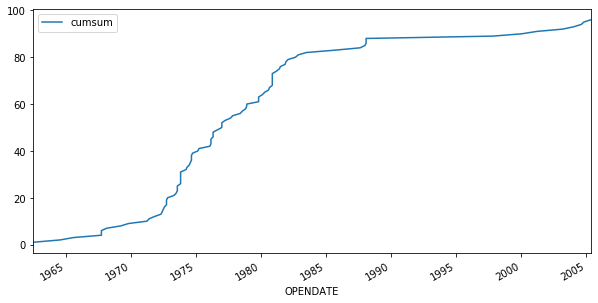

In [8]:
# Your answer to Graded Task 4 here:
data = stdf[['OPENDATE','cumsum']]
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10,5)
data.plot(x='OPENDATE',y='cumsum')

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

In [9]:
def total_stores_opened(data, state, year):
    #set count equals to zero
    count = 0 
    #loop through dataframe
    for index in data.index:
        #check if the state and year equal to given conditions
        if data['STRSTATE'][index] == state and data['YEAR'][index] == year:
            count = count + 1
    #return count
    return count

{'1990': 5, '1991': 0, '1992': 1, '1993': 2, '1994': 5, '1995': 5, '1996': 1, '1997': 0, '1998': 4, '1999': 2, '2000': 5, '2001': 11, '2002': 9, '2003': 10, '2004': 13, '2005': 17}


<BarContainer object of 16 artists>

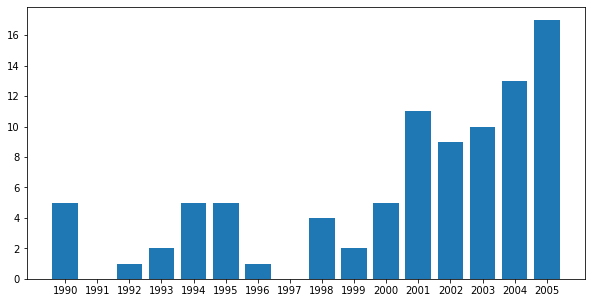

In [10]:
# Your asnwer to Graded Task 5 here:
import matplotlib.pyplot as plt
numb={}

for i in range(1990,2006):
    opst = total_stores_opened(df,"TX", i)

    numb[str(i)] = opst

print(numb)
plt.rcParams["figure.figsize"]=(10,5)
plt.bar(numb.keys(), numb.values())